# Jupyter Notebook to develop a Model for accurate prediction of Kidney Disease through Machine Learning Algorithms

## In our analysis, we will use three Machine Learning Algorithms: Logistic Regression, Naive Bayes and Support Vector. 

In [1]:
#Importing important modules and library to perform our Data Analysis and Machine Learning Algorithms 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset onto a Pandas Dataframe

dataset = pd.read_csv(r'C:\Users\My PC\Desktop\Medical\kidney.csv')

## Pre-Emptive Data Analysis 

In [3]:
#The Data will be pre-emptively analyzed to make the best out of it and help us understand the best fit for the algorithms

In [5]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,1.0,1.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,1.0,1.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [6]:
dataset.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0
399,399,58.0,80.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,...,53,6800,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0


Here our target outcome is the "classification" parameter where 1 means that the person is suffering from a Chronic Kidney
Disease while 0 means that the person is suffering from a Non-Chronic Kidney Disease. 

The other parameters in our dataset has been detailed below: 

1. id: The ID Number of the Patient
2. age: The Age of the Patient
3. bp: The Blood Pressure of the Patient
4. sg: Nominal Specific Gravity
5. al: Nominal Albumin Level
6. su: Nominal Sugar Level
7. pcc: Nominal Puss Cell Clumps
8. rbc: Red Blood Cell Level
9. pc: Level of Puss Cells
10. pcv: Packed Cell Volume
11. htn: Hypertension
12. cad: Coronary Artery Disease
13. ane: Checks if the patient has anaemia or not

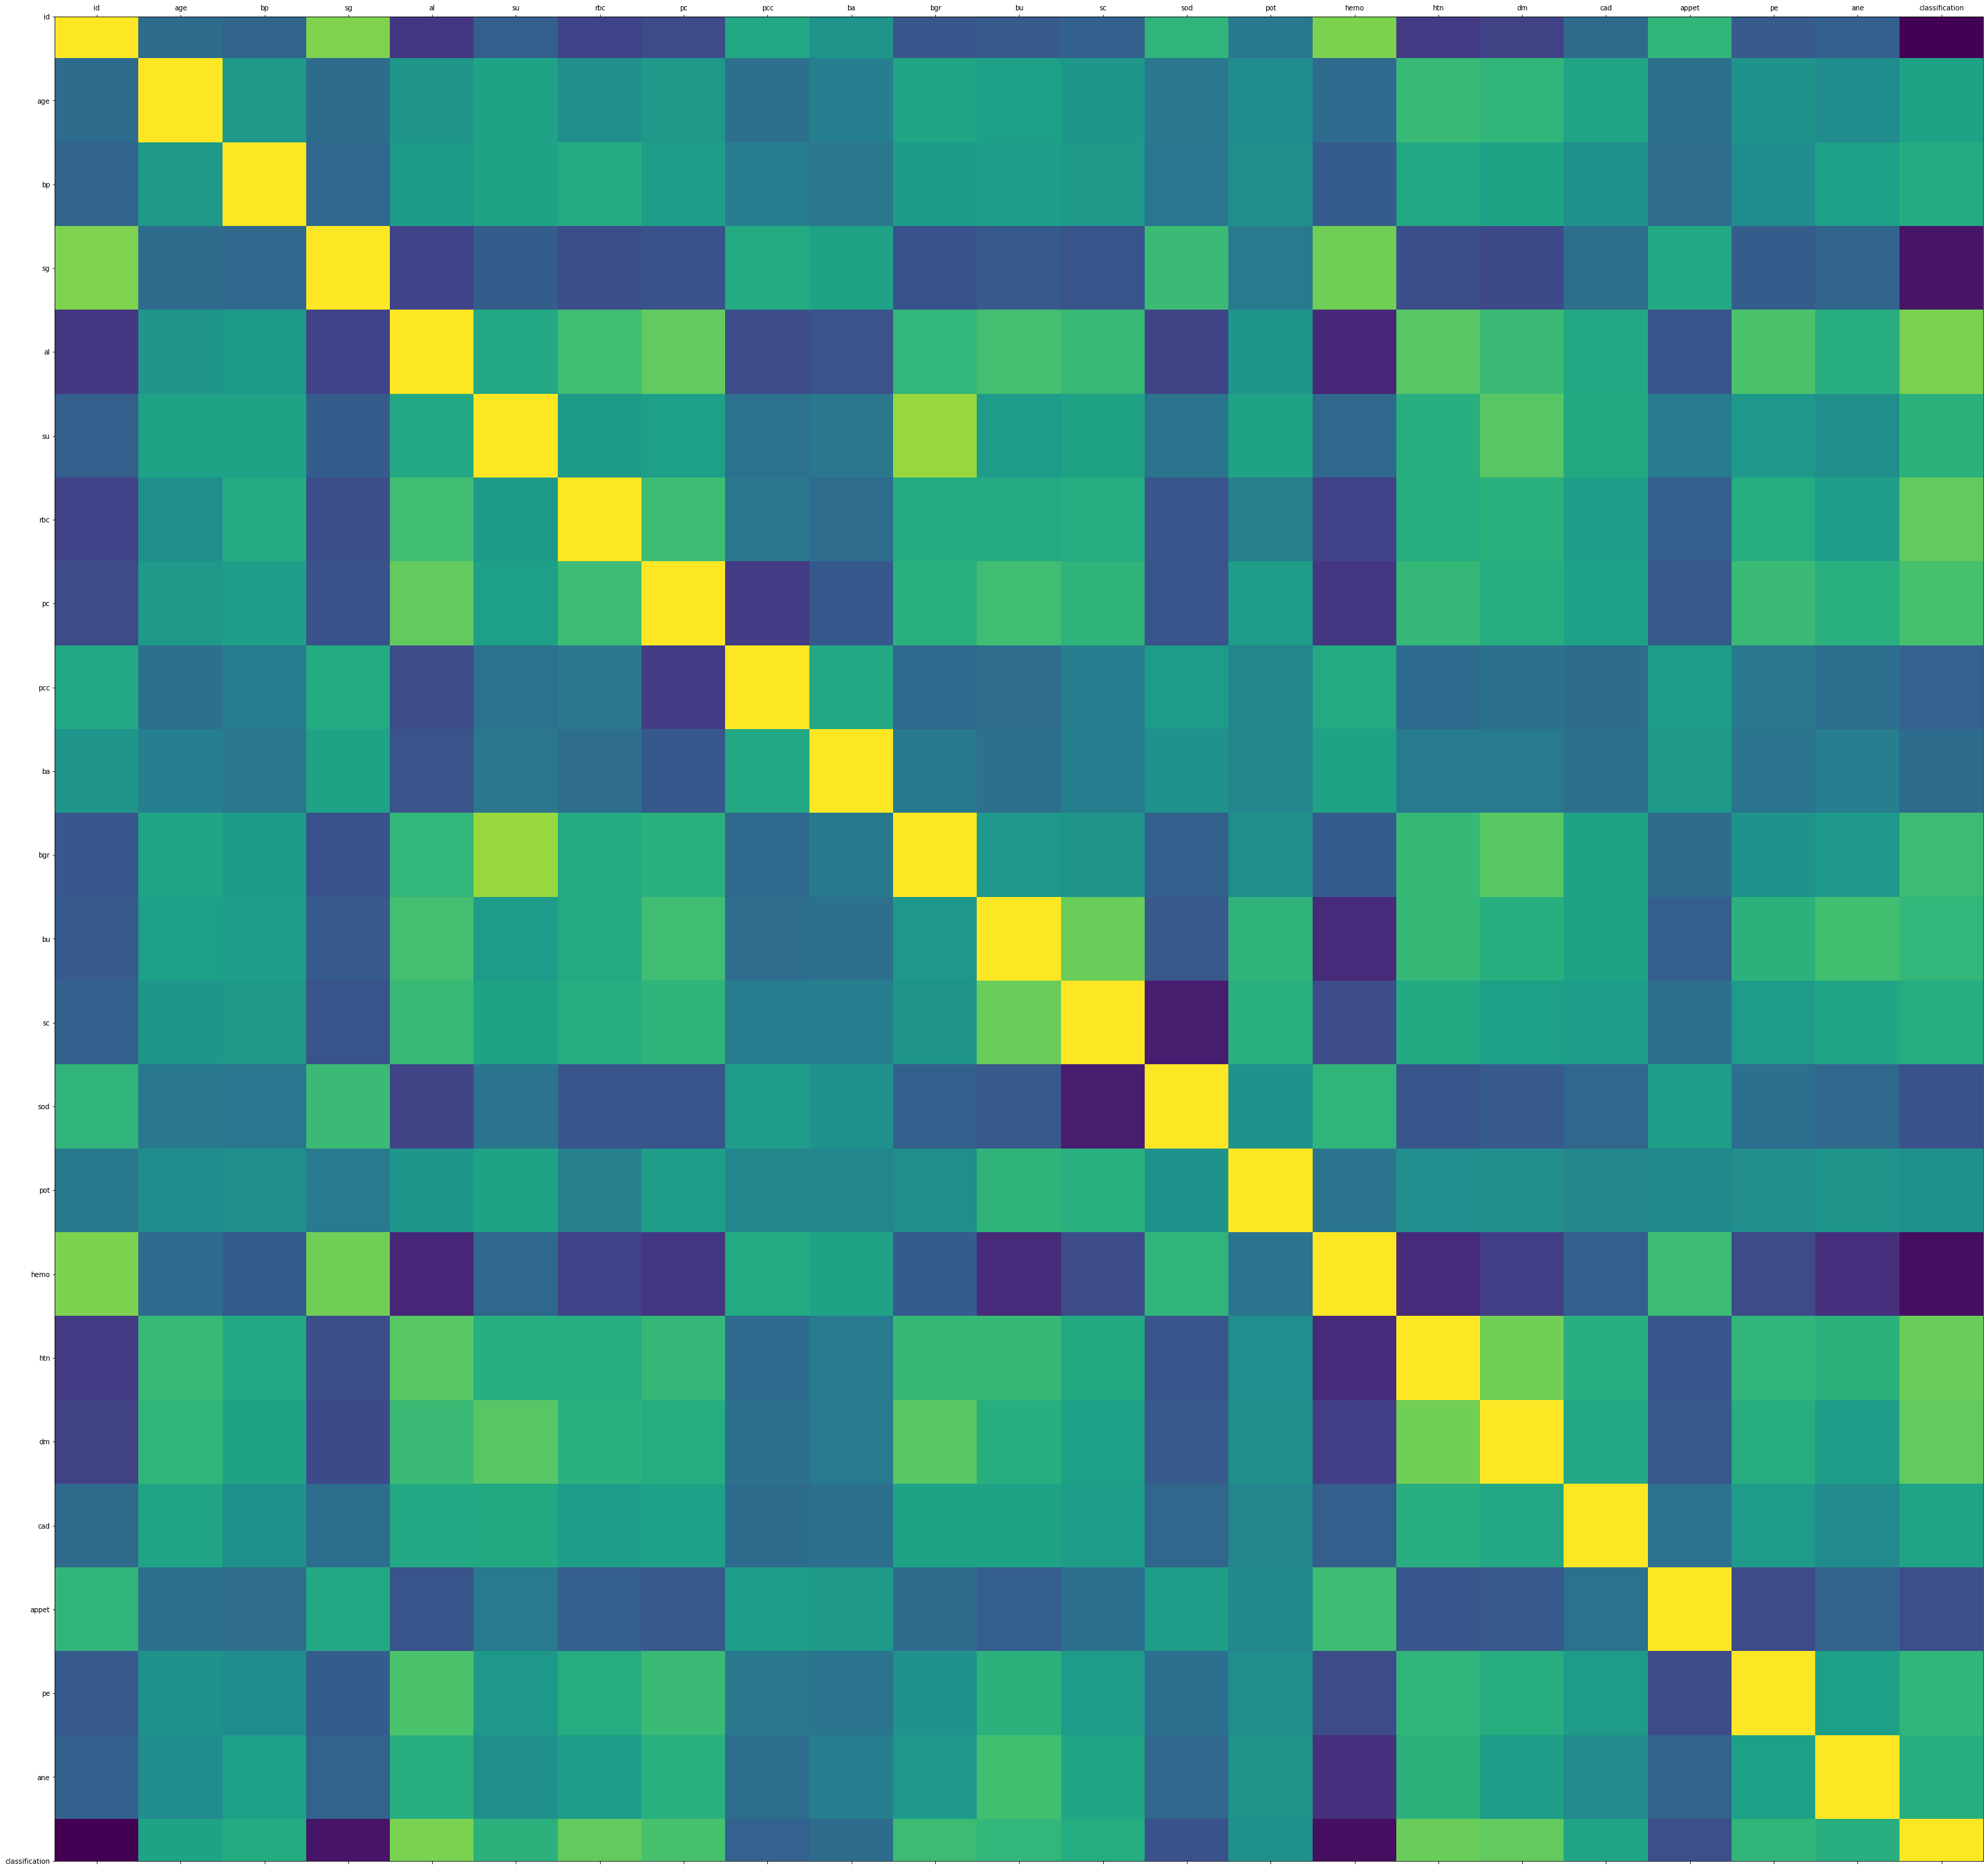

In [8]:
#Showing a Co-Relation between different Data onto our Dataframe

def plot_it(dataframe, size=50):
    corr = dataframe.corr()    # A Dataframe Co-Relation Function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # Color Codes the recangle according to their value
    plt.xticks(range(len(corr.columns)), corr.columns)  
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_it(dataset)

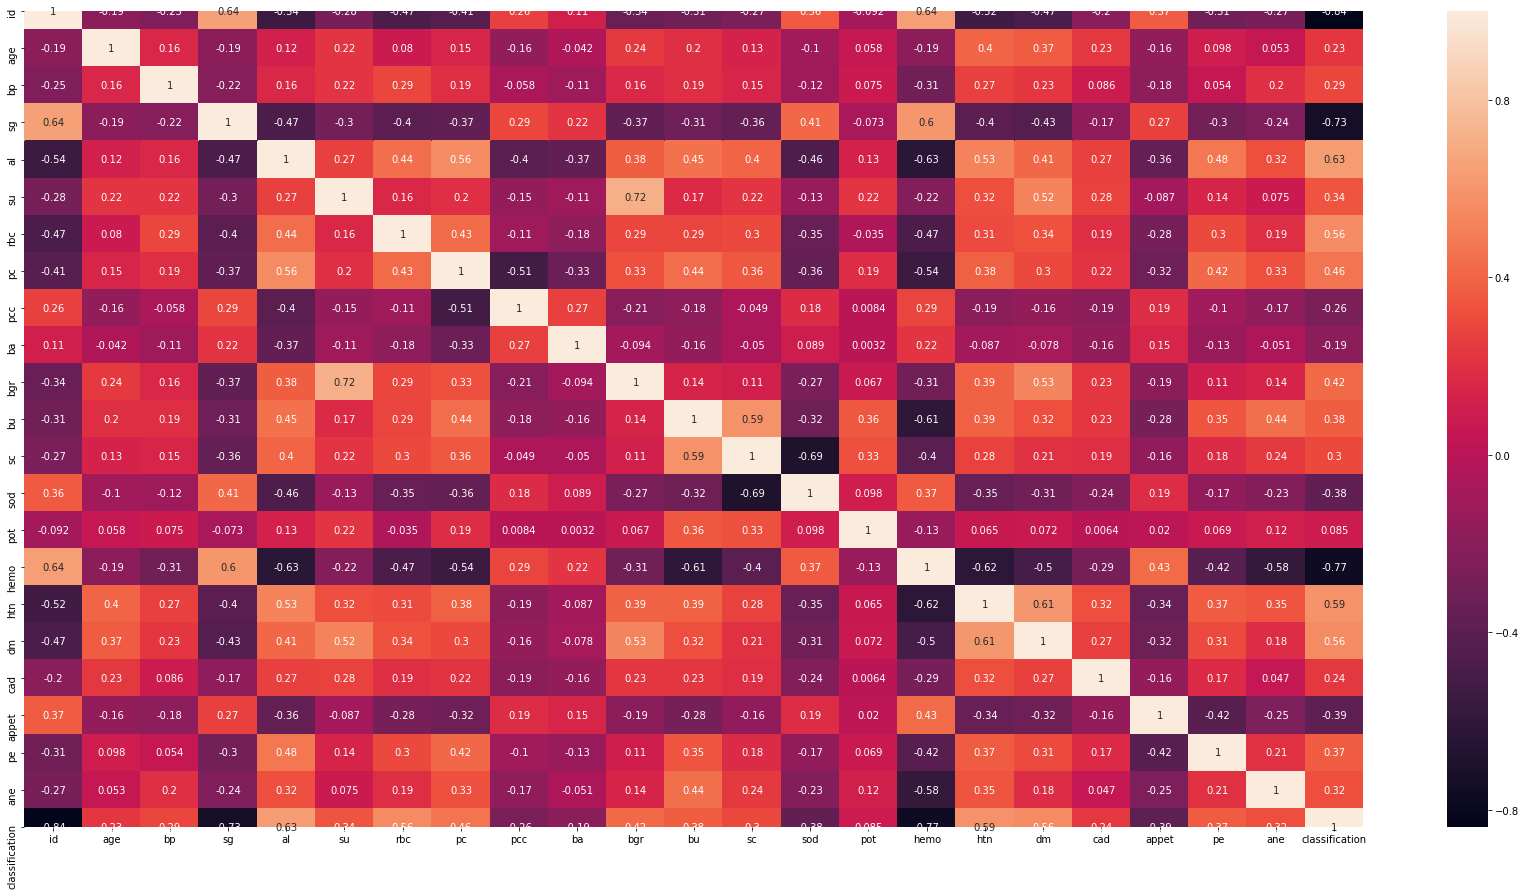

In [9]:
#Lets generate a heat-map to analyze our dataset

plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(), annot=True) 
plt.show()

Lets analyze the different parameters now for a better understanding of the Data and also to clean the Data for further analysis. 

In [11]:
#Checking for NULL values in our dataset

dataset.isnull().values.any()

True

In [12]:
#That's a pity! We have now to clean the dataset to get accurate results of our Data Analysis.

dataset=dataset.dropna(axis = 0, how ='any') 
dataset.isnull().values.any()

False

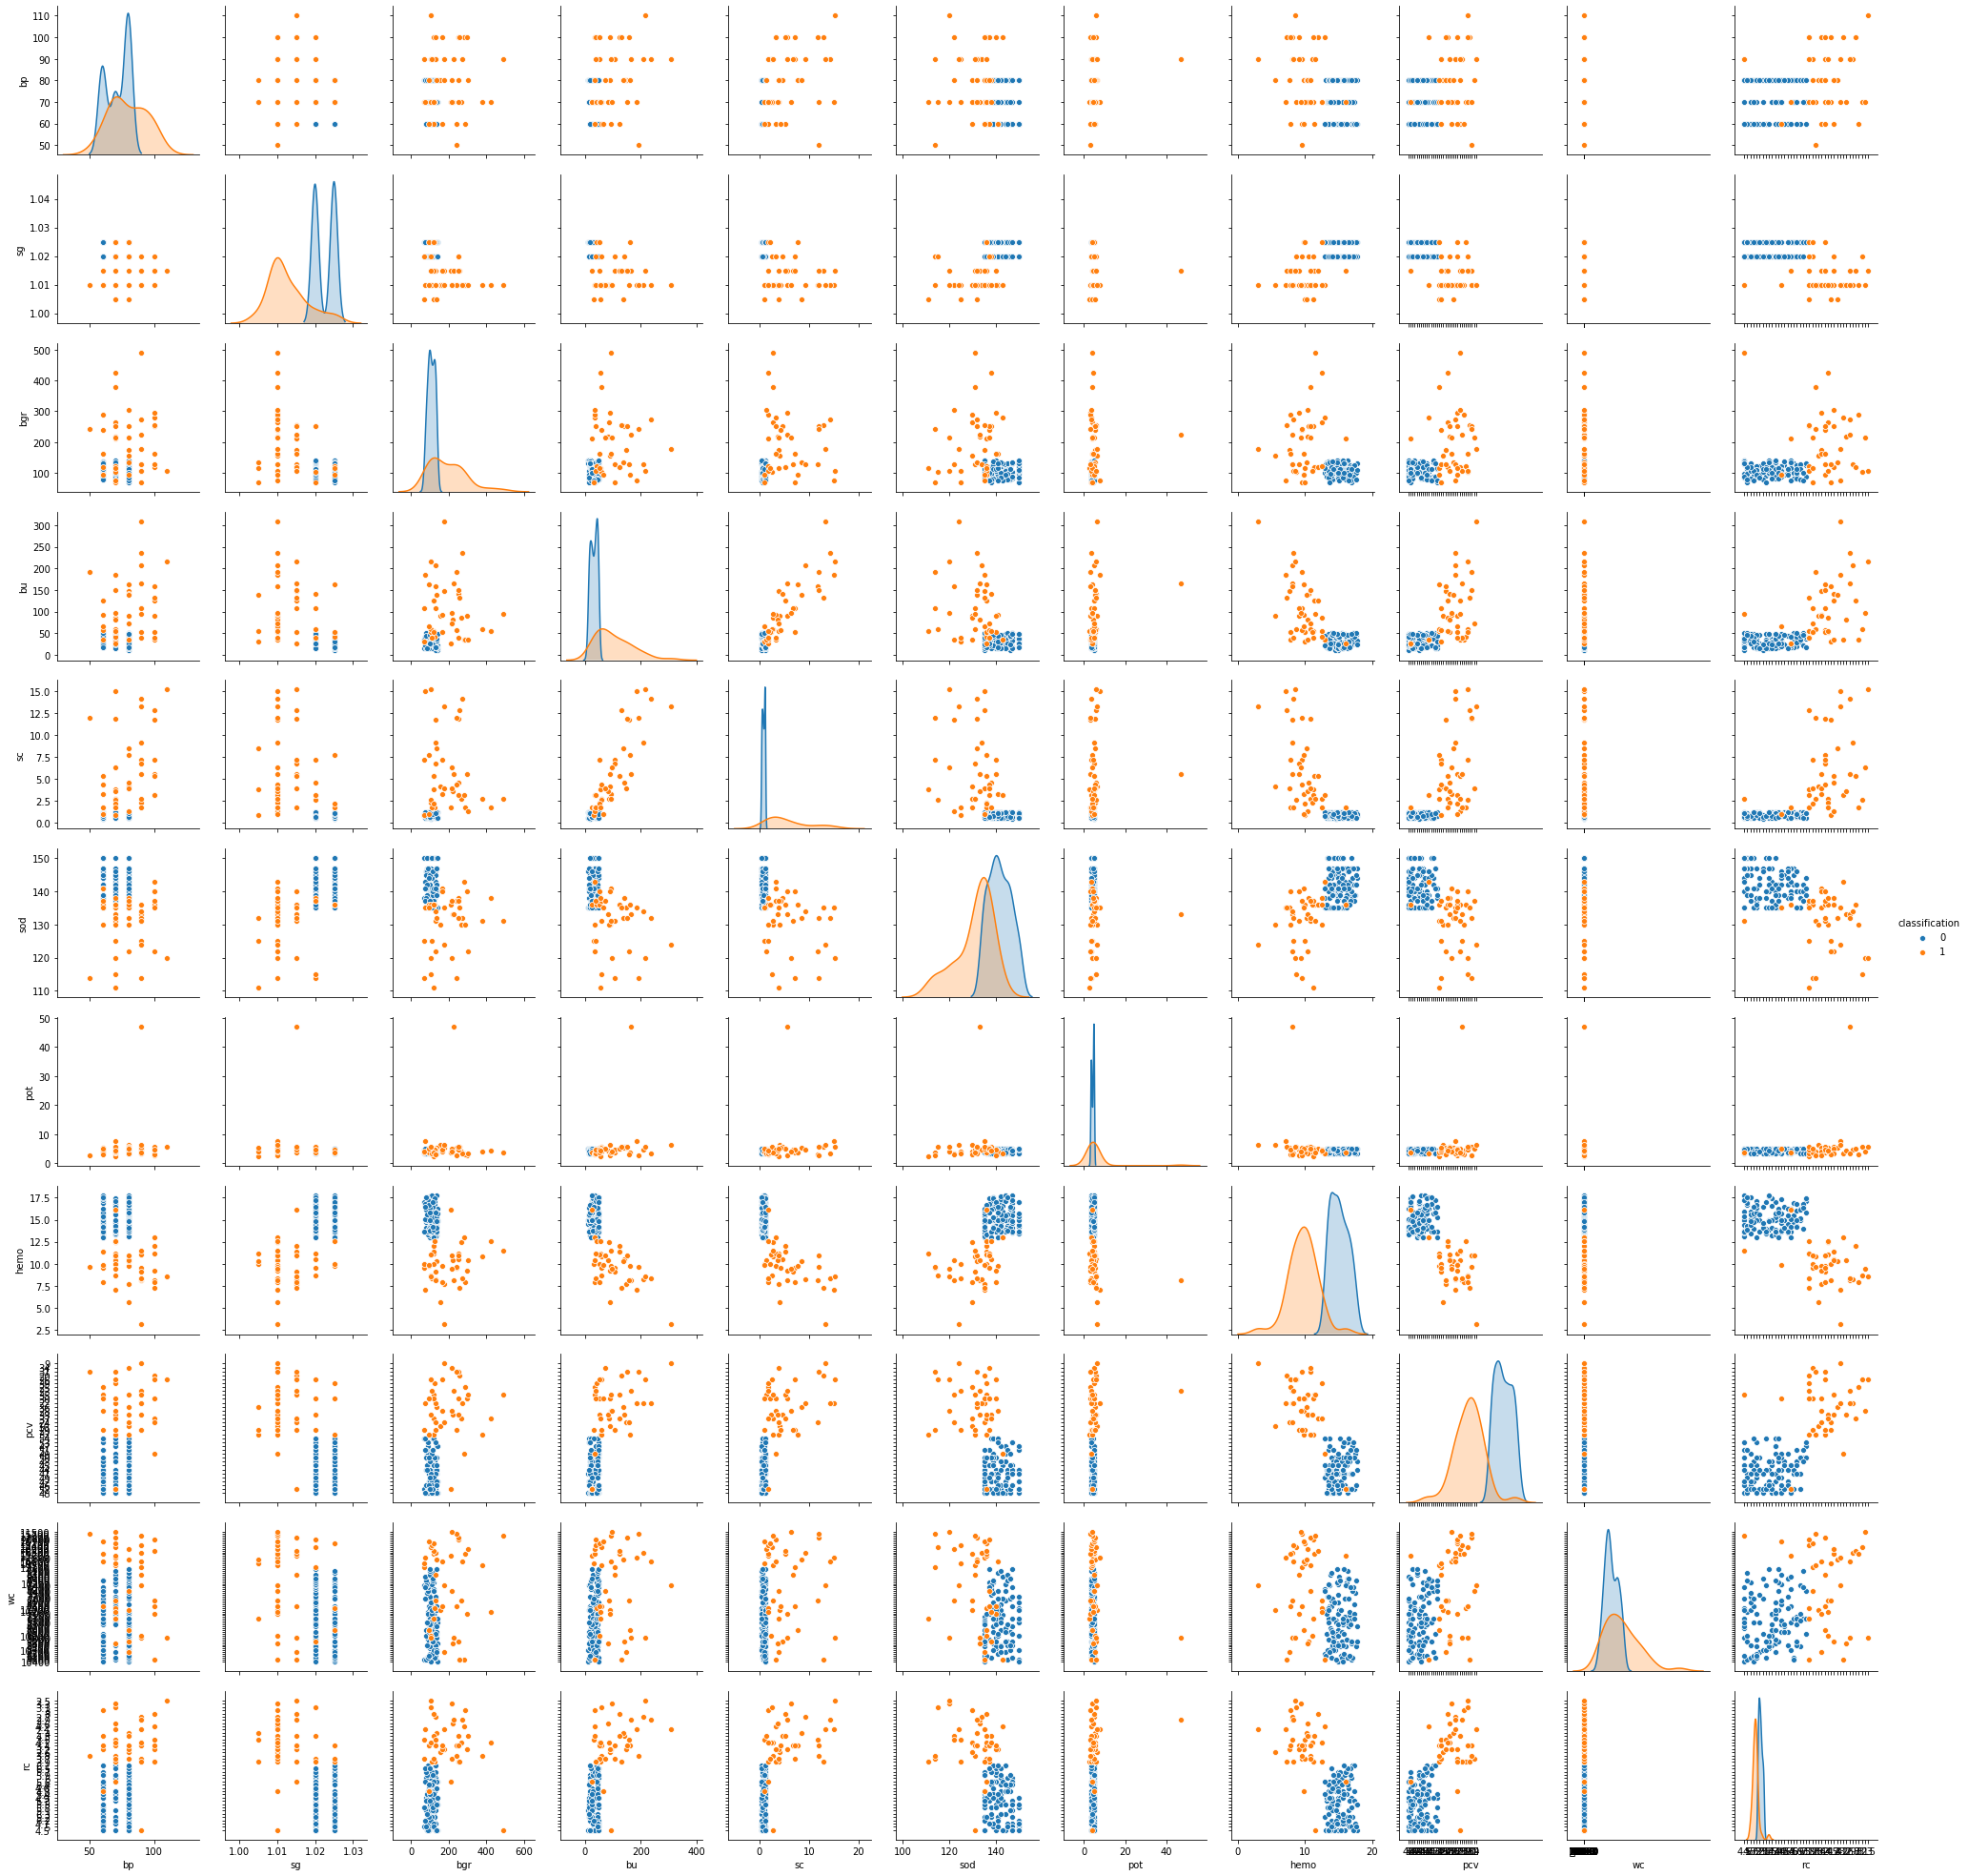

In [14]:
#We are good to go now.
#Lets analyze all the parameters of our Dataset.

sns.pairplot(dataset, hue='classification', vars=['bp','sg','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'])
plt.show()

In [15]:
print('Columns of our Dataset: \n',dataset.columns)

Columns of our Dataset: 
 Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [16]:
print('Unique Column Count: \n')
for col in dataset:
    print(len(dataset[col].unique()), col)

Unique Column Count: 

158 id
58 age
7 bp
5 sg
5 al
6 su
2 rbc
2 pc
2 pcc
2 ba
78 bgr
66 bu
39 sc
26 sod
32 pot
80 hemo
34 pcv
71 wc
41 rc
2 htn
2 dm
2 cad
2 appet
2 pe
2 ane
2 classification


In [17]:
dataset.shape

(158, 26)

In [18]:
dataset.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,0.113924,0.183544,0.911392,0.924051,...,138.848101,4.636709,13.687342,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266,0.272152
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,...,7.489421,3.476351,2.882204,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,111.000000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,135.000000,3.700000,12.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,139.000000,4.500000,14.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,144.000000,4.900000,15.775000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,150.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
id                158 non-null int64
age               158 non-null float64
bp                158 non-null float64
sg                158 non-null float64
al                158 non-null float64
su                158 non-null float64
rbc               158 non-null float64
pc                158 non-null float64
pcc               158 non-null float64
ba                158 non-null float64
bgr               158 non-null float64
bu                158 non-null float64
sc                158 non-null float64
sod               158 non-null float64
pot               158 non-null float64
hemo              158 non-null float64
pcv               158 non-null object
wc                158 non-null object
rc                158 non-null object
htn               158 non-null float64
dm                158 non-null float64
cad               158 non-null float64
appet             158 non-null float64
pe 

In [20]:
dataset["classification"].unique()

array([1, 0], dtype=int64)

0    115
1     43
Name: classification, dtype: int64


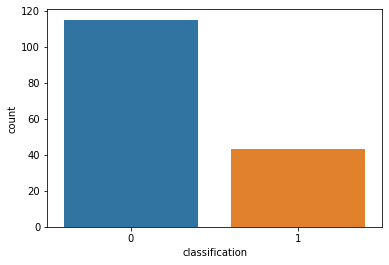

In [21]:
x=dataset["classification"]
sns.countplot(x)
our=dataset.classification.value_counts()
print(our)

That means almost 115 People are suffering from Chronic Kidney Disease while 43 People aren't suffering from Non-Chronic Kidney Disease.

In [22]:
#Lets analyze the different parameters in our Dataset with Boxplots

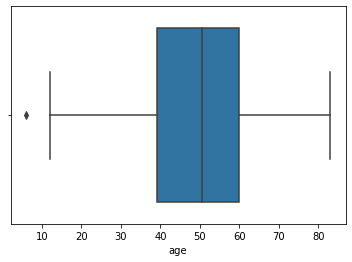

In [23]:
sns.boxplot(dataset["age"])

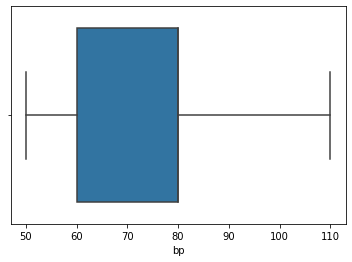

In [24]:
sns.boxplot(dataset["bp"])

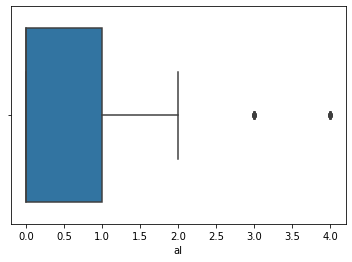

In [26]:
sns.boxplot(dataset["al"])

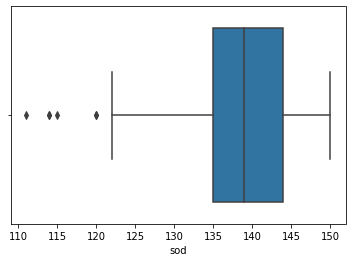

In [27]:
sns.boxplot(dataset["sod"])

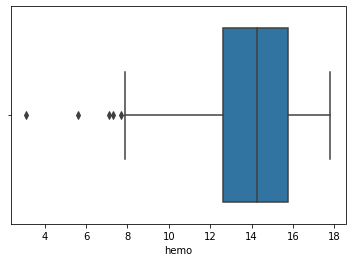

In [30]:
sns.boxplot(dataset["hemo"])

## Data-Set Splitting

In [31]:
from sklearn.model_selection import train_test_split
to_Predict=dataset.drop("classification",axis=1)
to_Target=dataset["classification"]

In [32]:
#We will split our Dataset into two parts: 70% Data for Training while the rest 30% Data will be used for testing
X_train,X_test,Y_train,Y_test = train_test_split(to_Predict,to_Target,test_size=0.30,random_state=0)

#Hullo! Our Training and Testing Data is prepared!!

## Algorithms Used: Logistic Regression

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
predicted=logistic_regression.predict(X_test)

###########################################################

final_score=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Logistic Regression is %r" %(final_score))

The accuracy of our model implemented through Logistic Regression is 97.9167


c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Algorithms Used: Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)
predicted=gauss.predict(X_test)

###########################################################

final_score1=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Naive Bayes is %r" %(final_score1))

The accuracy of our model implemented through Naive Bayes is 100.0


## Algorithms Used: Support Vector

In [35]:
from sklearn import svm
Support_Vector=svm.SVC(kernel="linear")
Support_Vector.fit(X_train,Y_train)
predicted=Support_Vector.predict(X_test)

###########################################################

final_score2=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Support Vector Classification is %r" %(final_score2))

The accuracy of our model implemented through Support Vector Classification is 100.0


## Final Analysis 

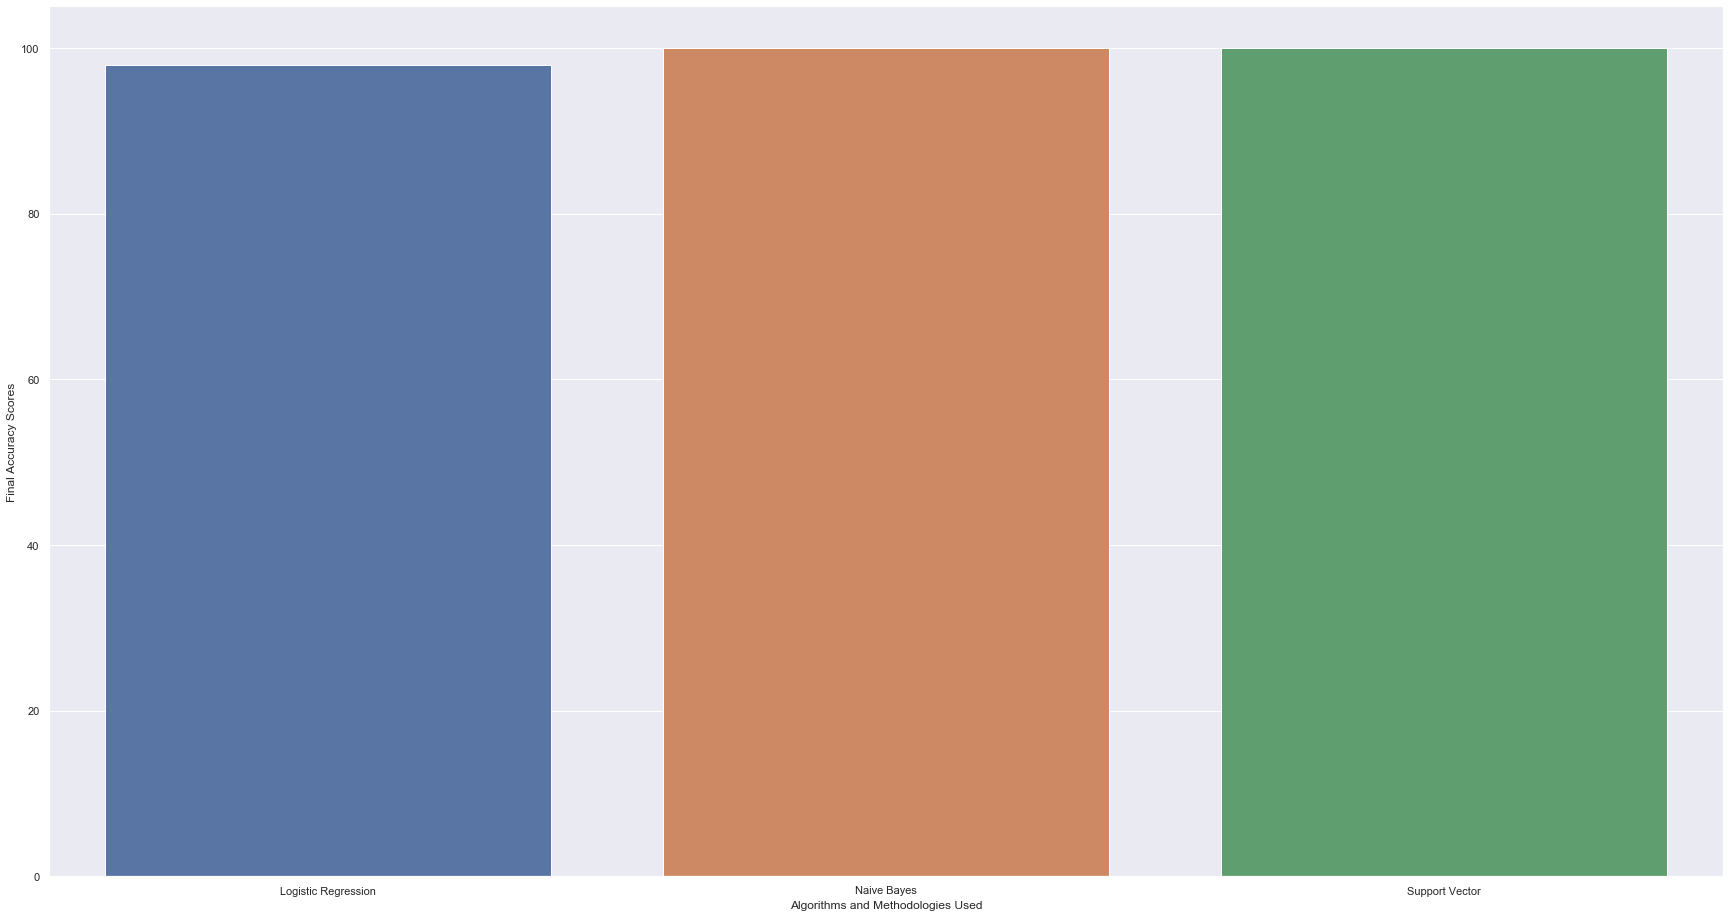

In [36]:
finale=[final_score,final_score1,final_score2]
methods=["Logistic Regression","Naive Bayes","Support Vector"]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final Accuracy Scores")
sns.barplot(methods,finale)

## 100% Accuracy with Naive Bayes and Support Vector. Well, didn't expect that! 

## Let's print the Confusion Matrix for each of our algorithms 

In [37]:
from sklearn.metrics import confusion_matrix
hinata=logistic_regression.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

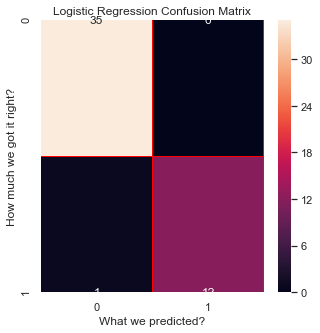

In [38]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

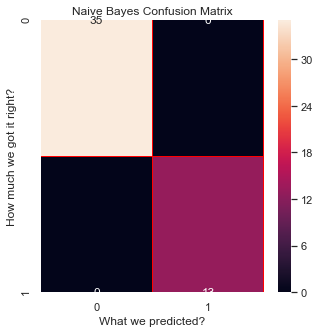

In [39]:
hinata=gauss.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

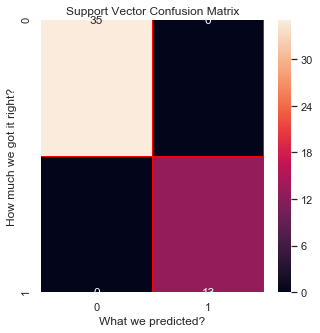

In [40]:
hinata=Support_Vector.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Support Vector Confusion Matrix")
plt.show()

## Calculating the Root-Mean Squared Error 

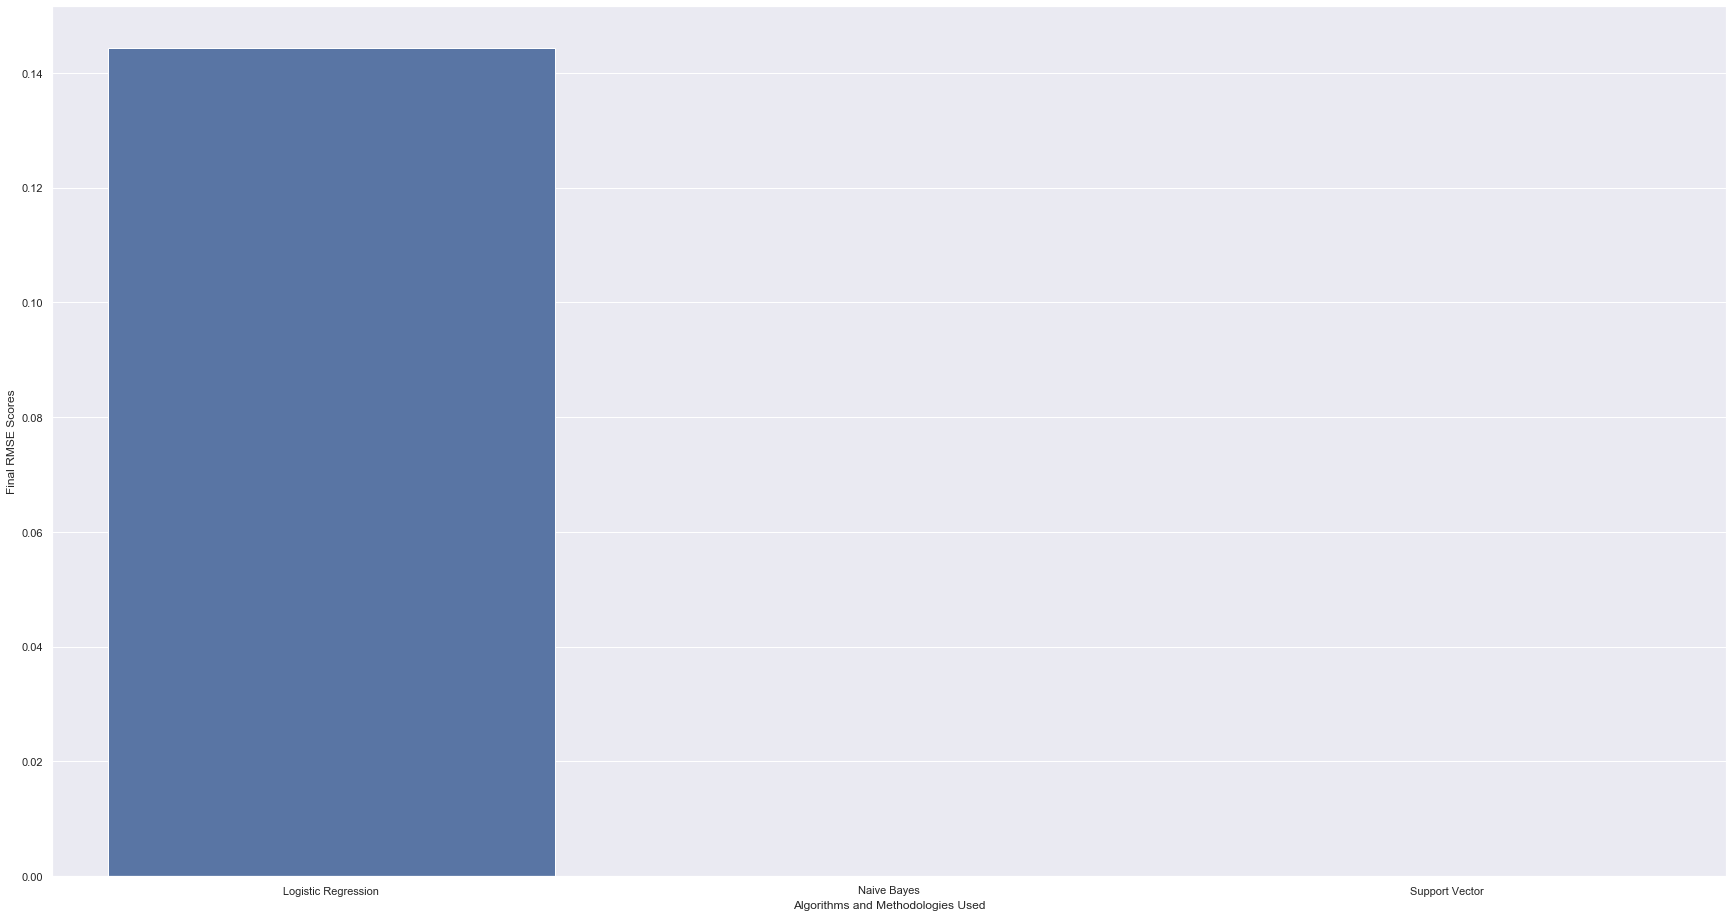

In [41]:
#Calculating Root-Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_pred_lr = logistic_regression.predict(X_test)
Y_pred_rf = gauss.predict(X_test)
Y_pred_svm=Support_Vector.predict(X_test)

rmse_lr = sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_svm= sqrt(mean_squared_error(Y_test, Y_pred_svm))
rmse_gauss = sqrt(mean_squared_error(Y_test, Y_pred_rf))

rmse_scores=[rmse_lr,rmse_gauss,rmse_svm]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final RMSE Scores")
sns.barplot(methods,rmse_scores)